<h2>HW4-2：直線モデル $f_{\theta}\theta(x) = \theta_1 + \theta_2x$ に対して, テューキー回帰の繰り返し最小二乗アルゴリズムを実装せよ
</h2>
※非凸最適化のため,得られる解は 初期値の選び方に依存する

Huber
The estimated answer is 
 [[ 3.71593422]
 [ 0.7700605 ]]
Tukey
The estimated answer is 
 [[ 5.15096612]
 [ 0.21082948]]


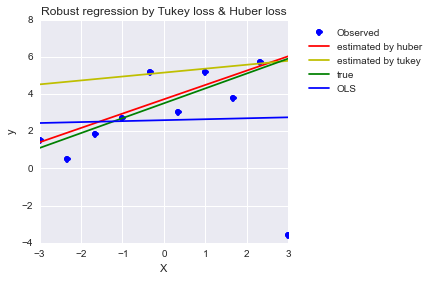

In [34]:
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from numpy.linalg import inv
import statsmodels.api as sm
import sys
%matplotlib inline


"""
メインの関数
"""
#引数は
#説明変数の横ベクトルを縦に積み上げたもの、非説明変数の縦ベクトル、
#パラメータ、損失関数の名前"Huber" or "Tukey"
def ols( data, y, eta, algo ):
    #初期解
    theta = np.zeros((data.shape[1],1))


    """
    重み付き最小二乗法
    """
    def wols(y, X, W):
        Xsq = (X.T).dot(W).dot(X)
        res = np.linalg.inv( Xsq ).dot(X.T).dot(W).dot(y)
        return res






    #シータの評価
    def eva(new_theta , theta):
        if np.linalg.norm(new_theta - theta) < 0.001:
            return True
        else:
            return False

    def iter(data, y, theta, algo):
        r = data.dot(theta) - y #残差を取得
        W =  np.identity(r.shape[0])#単位行列作成
        length  =r.shape[0]

        #Wを作る 
        for i in range(0, length):
            if r[i,0] > eta :
#                 W[i,i] = 0
                if algo == "Huber":
                    W[i,i] = eta /np.linalg.norm(r[i, 0])
                elif algo == "Tukey":
                    W[i,i] = 0
                else:
                    sys.exit("The algorythm name is wrong")
            elif(r[i,0] <= eta):
                if algo == "Tukey":
                    wi = (1-np.power(r[i,0], 2))/np.power(eta, 2)
                    wi = np.power(wi, 2)
                    W[i,i] = wi
                elif algo == "Huber":
                    W[i,i] = 1
                else:
                    sys.exit("The algorythm name is wrong")
#         print(W)
        
        new_theta =wols(y, data ,W)
        return new_theta
    
    new_theta = iter(data, y, theta, algo)
    tf = eva(new_theta , theta)
    
    """繰り返し"""
    while(not tf):
        theta = new_theta
        new_theta = iter(data, y, theta, algo)
        tf = eva(new_theta , theta)
    print("The estimated answer is \n", new_theta)
    return new_theta






"""
サンプル
"""


if __name__ == '__main__':
    """
    データ生成
    """
    N = 10
    c = np.ones([N,1])
    u  = np.random.randn(N)
    u = np.matrix(u).T
    X = np.linspace(-3., 3., N)
    # Xn = X[0 : N-1]
    X = np.matrix(X).T

    data = np.c_[c, X] #データ行列
    coefs = np.array([[3.5,0.8]]).T #係数

    #観測値
    y = data.dot(coefs) + u

    #外れ値生成
    y[N-1] = y[N-1] - 10


    #param
    eta = 0.5
    #実行
    print("Huber")
    ansh = ols(data,y ,  eta, "Huber")
    print("Tukey")
    anst = ols(data,y ,  eta, "Tukey")


    #比較用の通常のOLS
    def ols(y, X):
            Xsq = (X.T).dot(X)
            res = np.linalg.inv( Xsq ).dot(X.T).dot(y)
            return res
    normal_ols = ols(y, data)


    """
    プロット
    """
    plt.title("Robust regression by Tukey loss & Huber loss")
    plt.plot( X ,y, "bo ", label = "Observed")
    plt.plot( X ,data.dot(ansh) , "r-", label = "estimated by huber")
    plt.plot( X ,data.dot(anst) , "y-", label = "estimated by tukey")

    plt.plot( X ,data.dot(coefs) , "g-", label = "true")
    plt.plot( X ,data.dot(normal_ols) , "b-", label = "OLS")


    plt.xlabel("X")
    plt.ylabel("y")


    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1)) # 凡例を表示
    plt.subplots_adjust(right=0.7)#余白調整
    plt.show()
